# Decision Tree Regressor Implementation 

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [4]:
## california house predictig data set
from sklearn.datasets import fetch_california_housing
california_df=fetch_california_housing()

In [26]:
type(california_df)

sklearn.utils._bunch.Bunch

In [10]:
df=pd.DataFrame(california_df.data,columns=california_df.feature_names)

In [27]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df['Target']=california_df.target

In [12]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
df.shape

(20640, 9)

In [14]:
## Taking Sample Data
df=df.sample(frac=0.25)

In [16]:
df.shape

(5160, 9)

In [19]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
regressor=DecisionTreeRegressor()

In [25]:
regressor

DecisionTreeRegressor()

In [28]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [29]:
y_pred=regressor.predict(X_test)

In [30]:
y_pred

array([1.942, 1.075, 1.625, ..., 1.45 , 1.832, 2.537])

In [31]:
from sklearn.metrics import r2_score

In [37]:
score=r2_score(y_pred,y_test)

In [38]:
score

0.5407790257583702

In [41]:
## Hyperparameter Tuning 
parameter={
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12],
    'max_features':['auto', 'sqrt', 'log2']
}
regressor=DecisionTreeRegressor()

In [40]:
from sklearn.model_selection import GridSearchCV

In [44]:
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

In [45]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [46]:
regressorcv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'best'}

In [50]:
regressor=DecisionTreeRegressor(criterion= 'friedman_mse',max_depth= 6,max_features='auto',splitter='best')

In [51]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=6,
                      max_features='auto')

[Text(0.5302083333333333, 0.9285714285714286, 'x[0] <= 5.144\nfriedman_mse = 1.328\nsamples = 3457\nvalue = 2.07'),
 Text(0.26666666666666666, 0.7857142857142857, 'x[0] <= 3.191\nfriedman_mse = 0.839\nsamples = 2789\nvalue = 1.749'),
 Text(0.13333333333333333, 0.6428571428571429, 'x[5] <= 2.15\nfriedman_mse = 0.632\nsamples = 1448\nvalue = 1.413'),
 Text(0.06666666666666667, 0.5, 'x[6] <= 37.82\nfriedman_mse = 1.283\nsamples = 233\nvalue = 2.007'),
 Text(0.03333333333333333, 0.35714285714285715, 'x[7] <= -118.305\nfriedman_mse = 1.491\nsamples = 159\nvalue = 2.292'),
 Text(0.016666666666666666, 0.21428571428571427, 'x[6] <= 34.42\nfriedman_mse = 1.772\nsamples = 77\nvalue = 2.77'),
 Text(0.008333333333333333, 0.07142857142857142, 'friedman_mse = 1.185\nsamples = 33\nvalue = 3.726'),
 Text(0.025, 0.07142857142857142, 'friedman_mse = 1.012\nsamples = 44\nvalue = 2.054'),
 Text(0.05, 0.21428571428571427, 'x[7] <= -117.155\nfriedman_mse = 0.811\nsamples = 82\nvalue = 1.843'),
 Text(0.04166

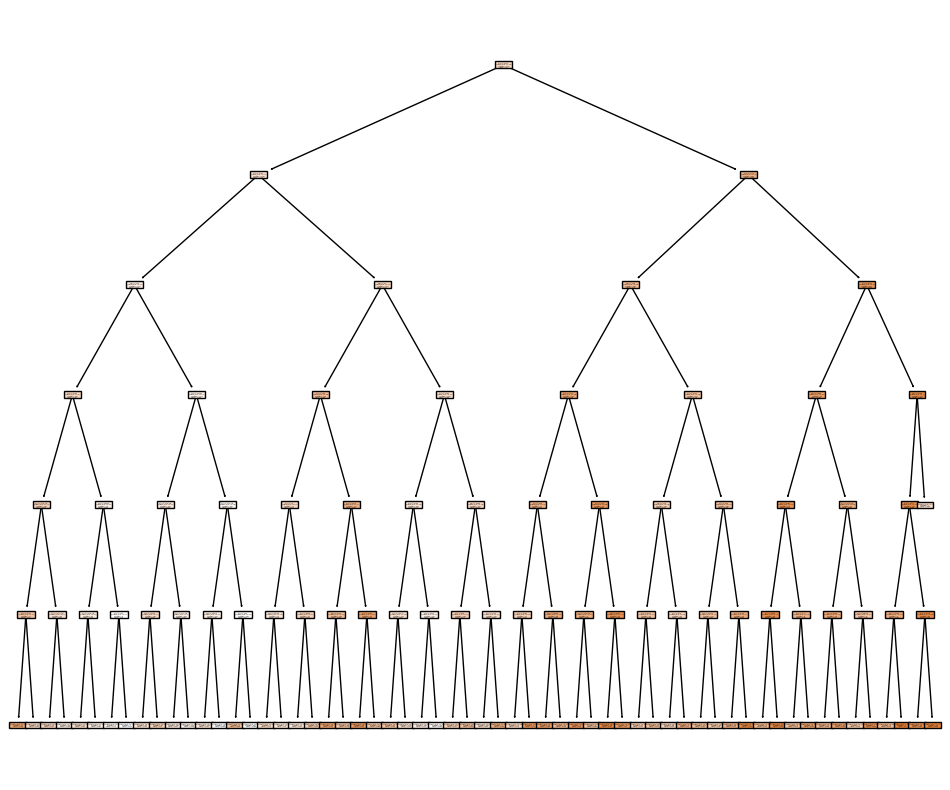

In [52]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled=True)

In [47]:
y_pred=regressorcv.predict(X_test)

In [48]:
y_pred

array([1.54686667, 1.75405742, 1.54686667, ..., 1.75405742, 1.9037543 ,
       2.95225218])

In [53]:
r2_score(y_test,y_pred)

0.6131420172567563